In [1]:
import cv2 as cv
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import os
import os.path as path
%matplotlib inline

In [2]:
def _imshow(image, gray=False):
    plt.figure(figsize=(12,8))
    if gray:
        plt.imshow(image, cmap='gray', interpolation = 'bicubic')
    else:
        plt.imshow(image, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

(23, 80, 3)


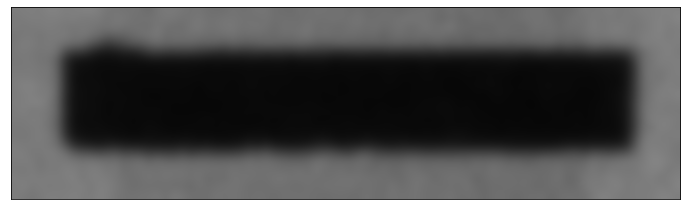

In [3]:
base_path = r'D:\\Datasets\\LinescanCS\\Hutamaki\\Huhta 250620200 - CAMPIONE 3YO'
base_img = cv.imread(os.path.join(base_path, 'marker.bmp') )
print(base_img.shape)
_imshow(base_img)

To greyscale


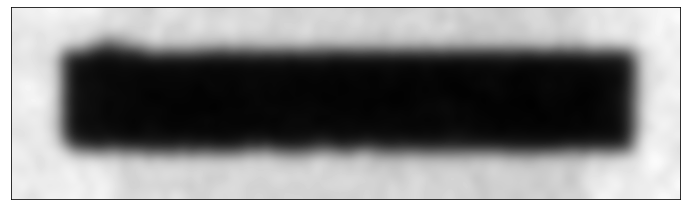

background value: 102 

Apply threshold


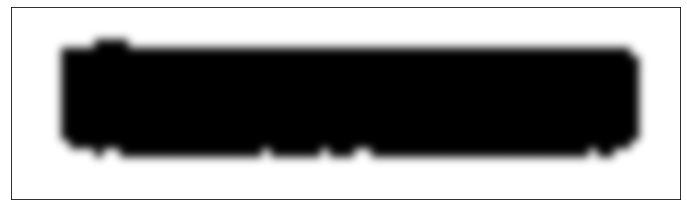

Edge extraction


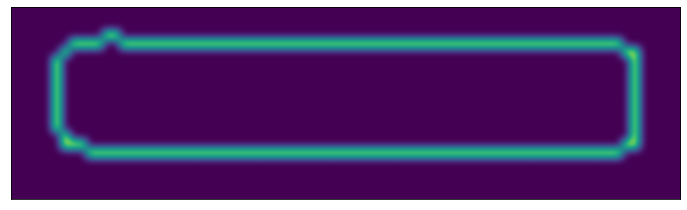

Number of connected components:  2
Template found Point(5:75, 3:18)


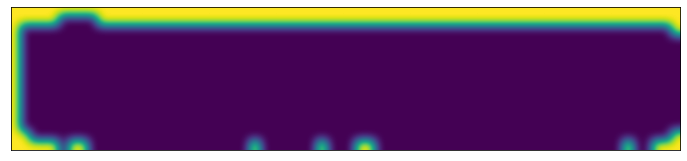

In [8]:
THRESHOLD = 25

print("To greyscale")
preprocessed = base_img.copy()
# convert to grayscale
preprocessed = cv.cvtColor(preprocessed, cv.COLOR_BGR2GRAY)
_imshow(preprocessed, True)
background = int(np.average(preprocessed[:10, :10]))
print('background value: {} \n'.format(background))
_, preprocessed = cv.threshold(preprocessed, background - THRESHOLD,255, cv.THRESH_BINARY  )
print("Apply threshold")
_imshow(preprocessed, True)
                                                
extracted_edges = cv.Canny(preprocessed,100,200)
print("Edge extraction")
_imshow(extracted_edges)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(extracted_edges)
if (retval == 0):
    raise ValueError("Oggetti non trovati")
print("Number of connected components: ", retval)

# Find the largest non background component.
# Note: range() starts from 1 since 0 is the background label.
max_idx, max_size = max([(i, stats[i, cv.CC_STAT_AREA]) for i in range(1, len(stats))], key=lambda x: x[1])
template_stat = stats[max_idx] 
template = preprocessed[template_stat[cv.CC_STAT_TOP]:template_stat[cv.CC_STAT_TOP]+template_stat[cv.CC_STAT_HEIGHT], 
               template_stat[cv.CC_STAT_LEFT]:template_stat[cv.CC_STAT_LEFT]+template_stat[cv.CC_STAT_WIDTH]]

print("Template found Point({}:{}, {}:{})".format(template_stat[cv.CC_STAT_LEFT], template_stat[cv.CC_STAT_LEFT]+template_stat[cv.CC_STAT_WIDTH], 
                                                  template_stat[cv.CC_STAT_TOP], template_stat[cv.CC_STAT_TOP]+template_stat[cv.CC_STAT_HEIGHT]))
_imshow(template)

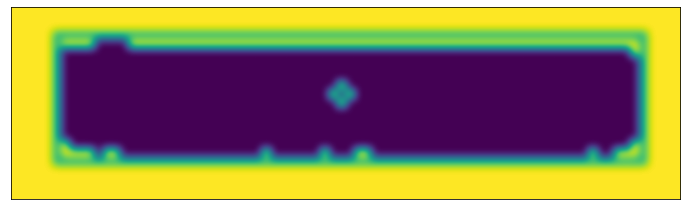

In [29]:
test = preprocessed.copy()

result = cv.matchTemplate(test, template, cv.TM_SQDIFF)
result = cv.normalize( result, result, 0, 1, cv.NORM_MINMAX);
minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(result)
matchLoc = minLoc;

result_img = cv.rectangle( test[:, :], matchLoc, ( matchLoc[0] + template.shape[1] , matchLoc[1] + template.shape[0] ), 160, 1, 8, 0 );
centroid = (int(centroids[max_idx][0]), int(centroids[max_idx][1]))
result_img = cv.circle(result_img, centroid , 1, (255, 255, 0))
_imshow(result_img)
# cv.imwrite(os.path.join(base_path, "result.bmp"), result_img)